In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

# Overdensity Power Spectrum Comparisons

In [3]:
overdensityP2560NS2048 = hp.read_map("MAPS/overdensity_NS_2048_R_2048_P_2560_DV_256.fits")
overdensityP2048NS2048 = hp.read_map("MAPS/overdensity_NS_2048_R_2048_P_2048_DV_256.fits")

In [4]:
psOverP2560NS2048 = hp.sphtfunc.anafast(overdensityP2560NS2048)
psOverP2048NS2048 = hp.sphtfunc.anafast(overdensityP2048NS2048)

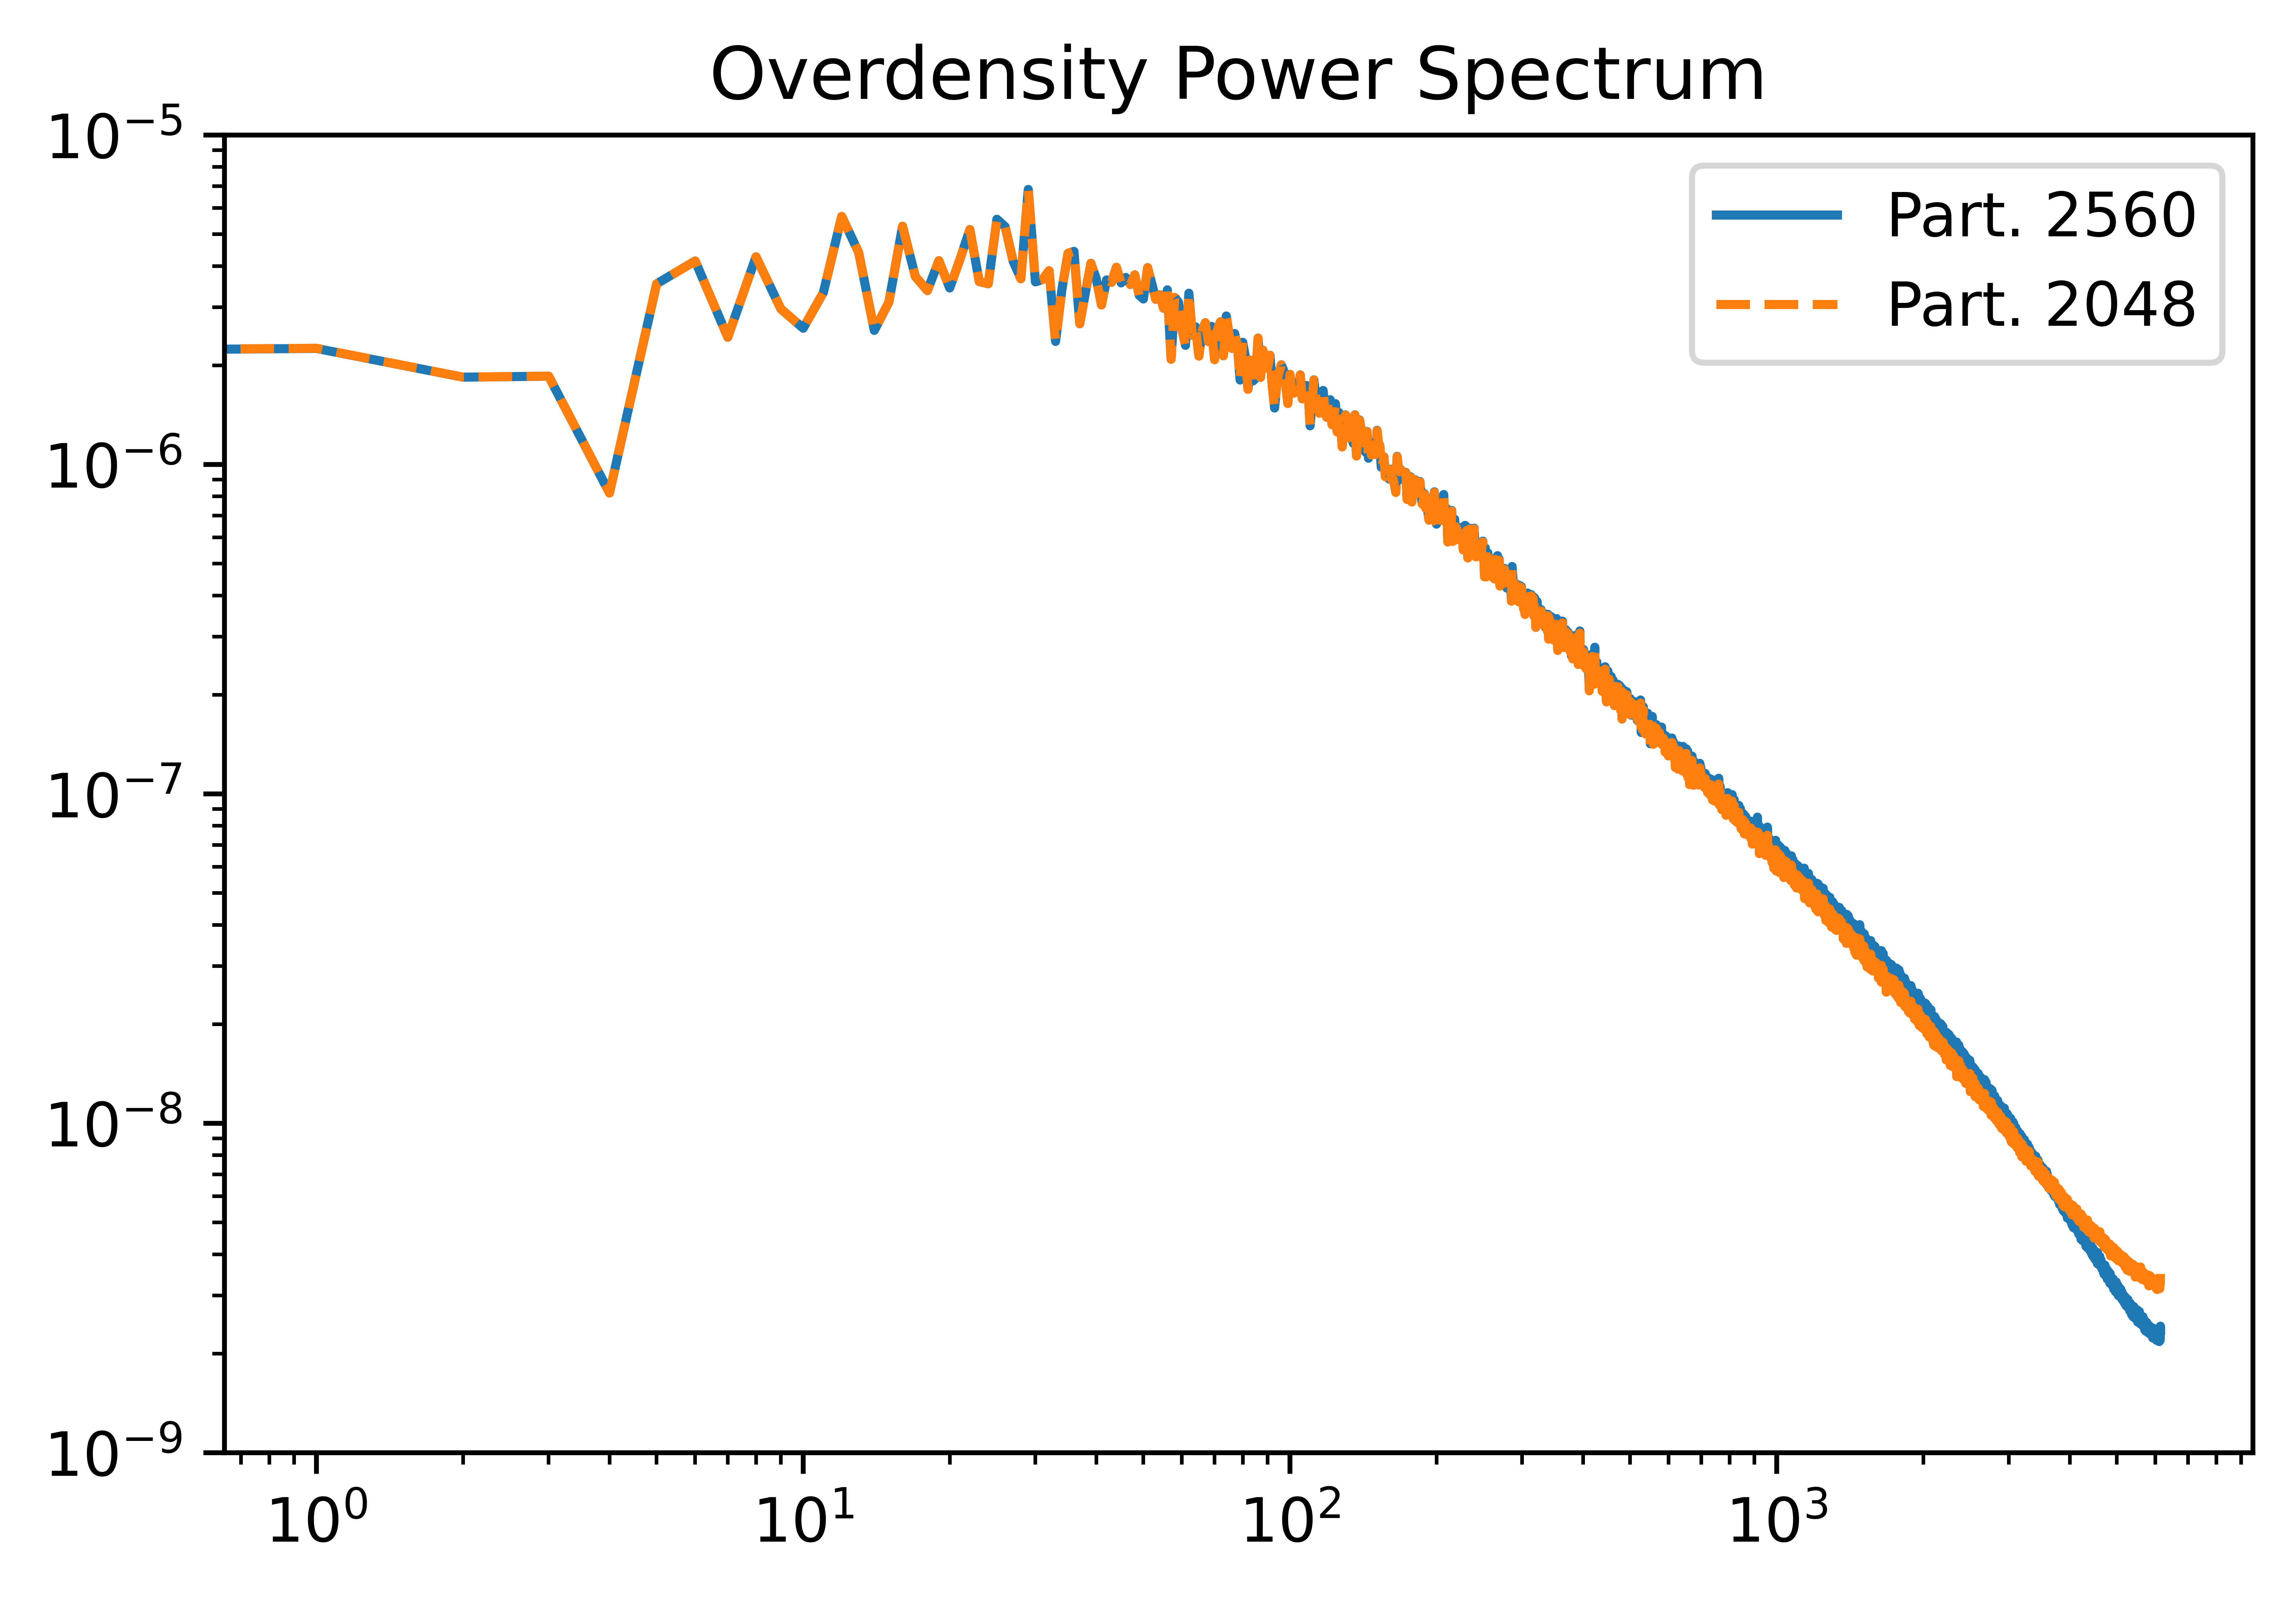

In [5]:
plt.figure(dpi=1200)
plt.loglog(psOverP2560NS2048);
plt.loglog(psOverP2048NS2048,"--")
plt.legend(loc=0, labels=["Part. 2560", "Part. 2048"])
plt.title("Overdensity Power Spectrum")
plt.ylim(10**-9,10**-5)
plt.show()

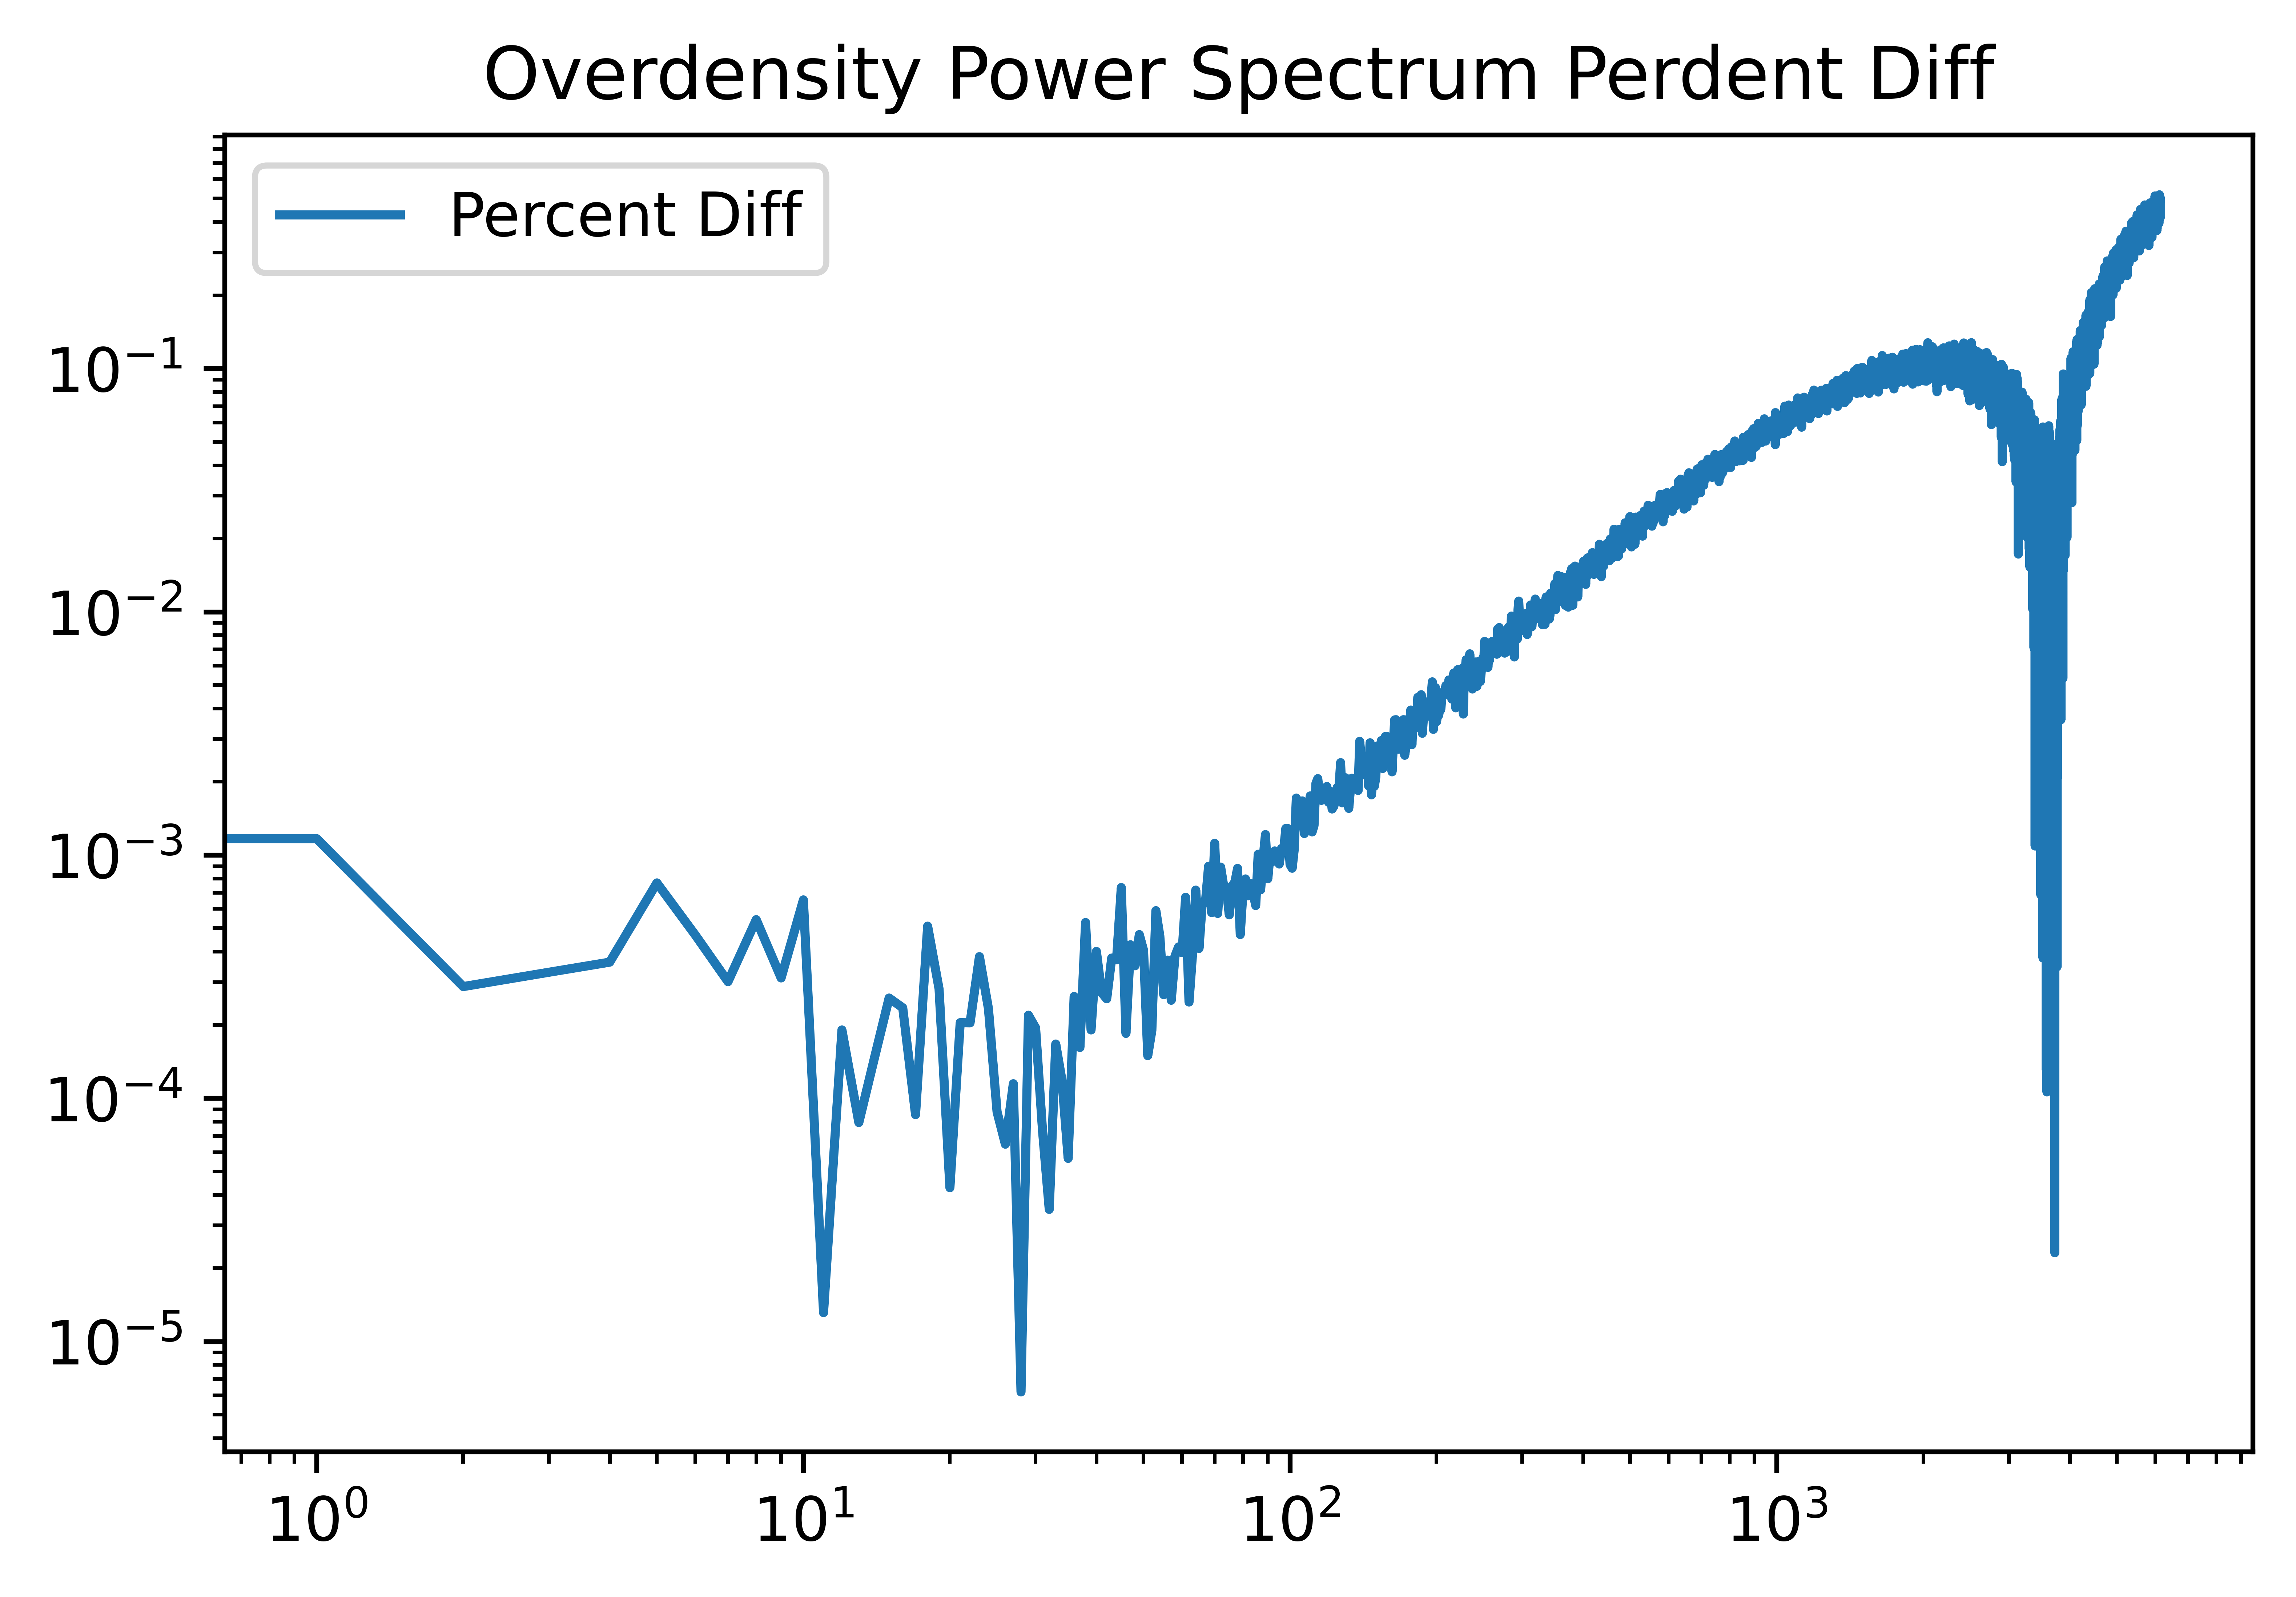

In [6]:
plt.figure(dpi=1200)
plt.loglog(np.abs(psOverP2560NS2048-psOverP2048NS2048)/psOverP2560NS2048);
plt.legend(loc=0, labels=["Percent Diff"])
plt.title("Overdensity Power Spectrum Perdent Diff")
plt.show()

# kSZ Comparison

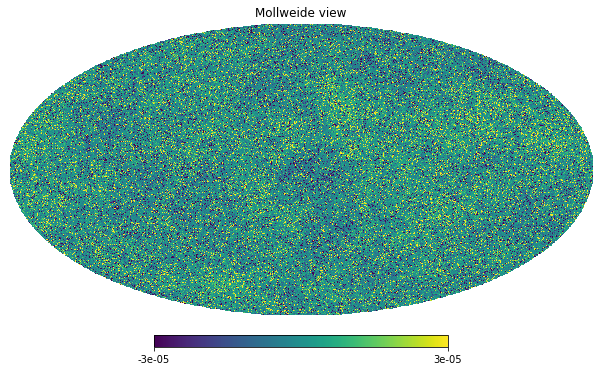

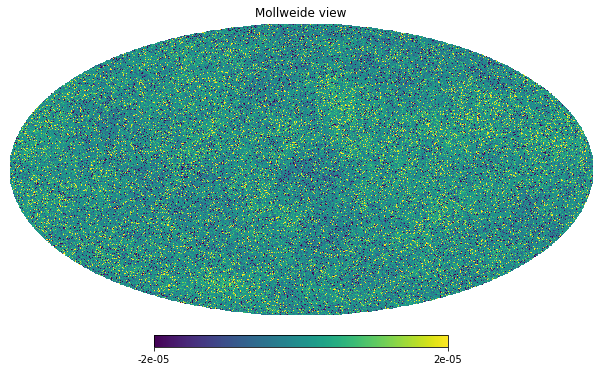

In [7]:
kSZP2560NS2048 = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2560_DV_256.fits")
kSZP2048NS2048 = hp.read_map("MAPS/kSZ_NS_2048_R_2048_P_2048_DV_256.fits")
hp.mollview(kSZP2560NS2048, min=-3*10**-5,max=3*10**-5)
hp.mollview(kSZP2048NS2048, min=-2*10**-5,max=2*10**-5)

In [8]:
pskSZP2560NS2048 = hp.sphtfunc.anafast(kSZP2560NS2048)
pskSZP2048NS2048 = hp.sphtfunc.anafast(kSZP2048NS2048)

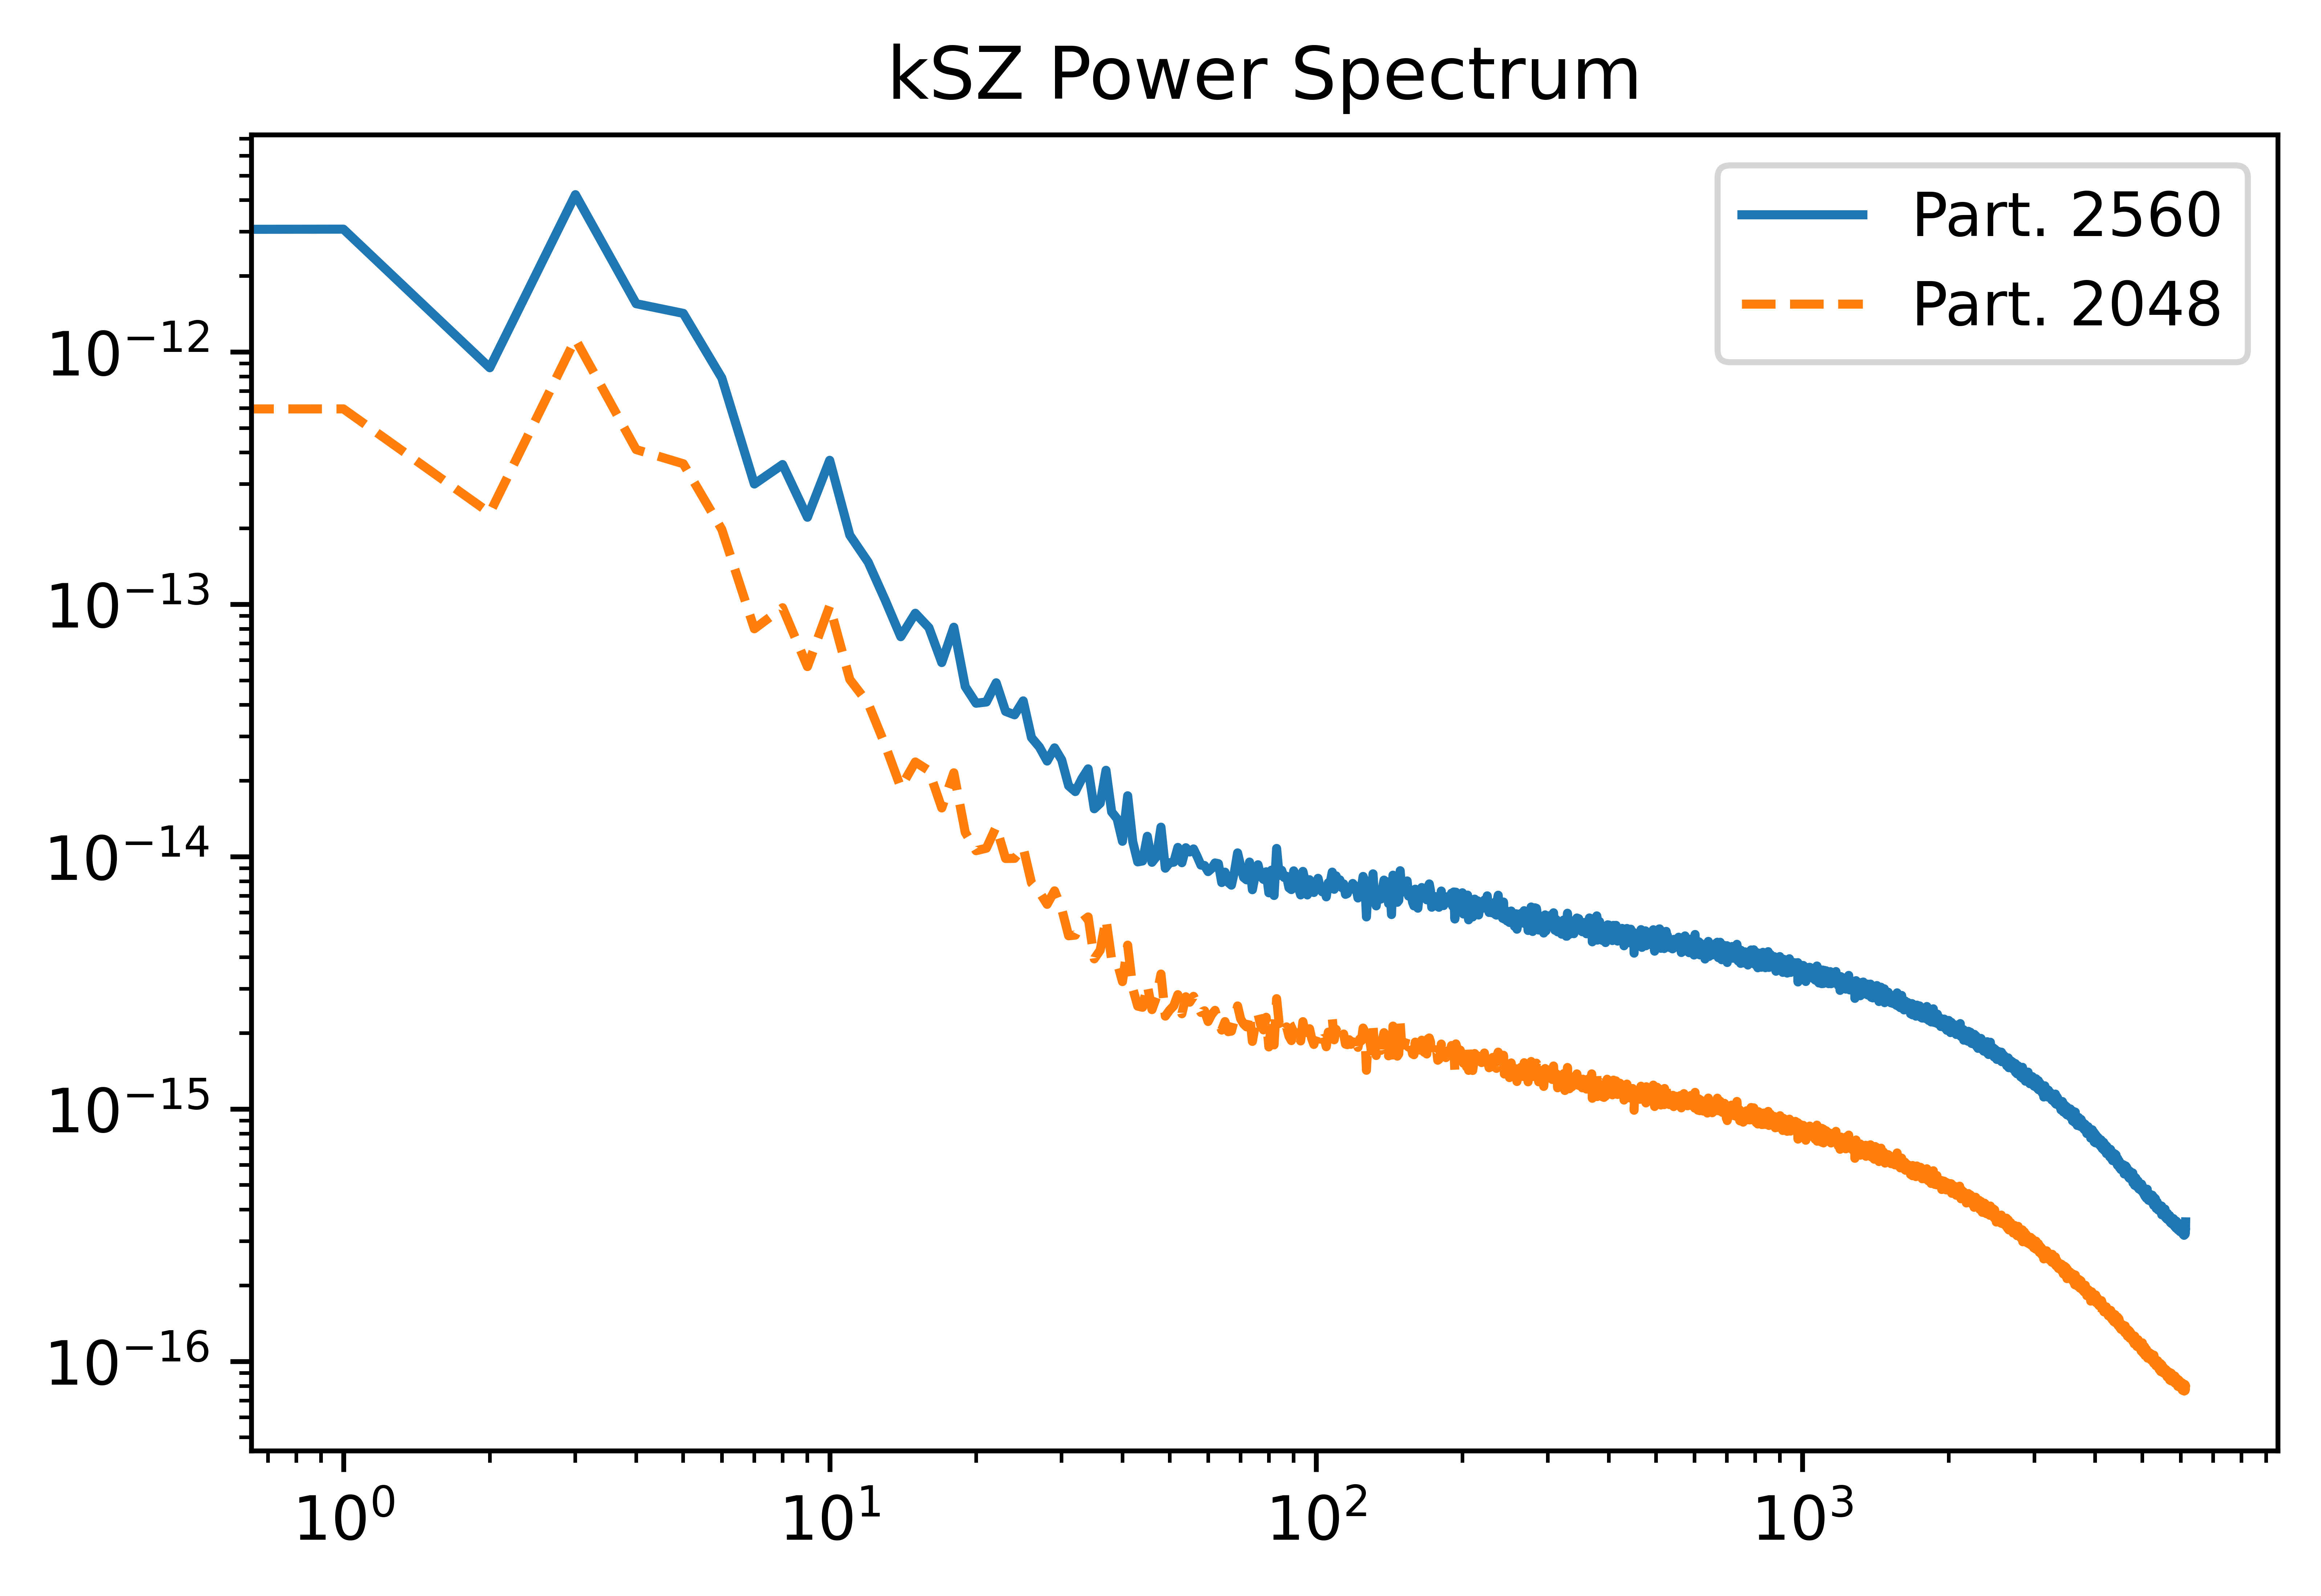

In [9]:
plt.figure(dpi=1200)
plt.loglog(pskSZP2560NS2048);
plt.loglog(pskSZP2048NS2048,"--")
plt.legend(loc=0, labels=["Part. 2560", "Part. 2048"])
plt.title("kSZ Power Spectrum")
plt.show()

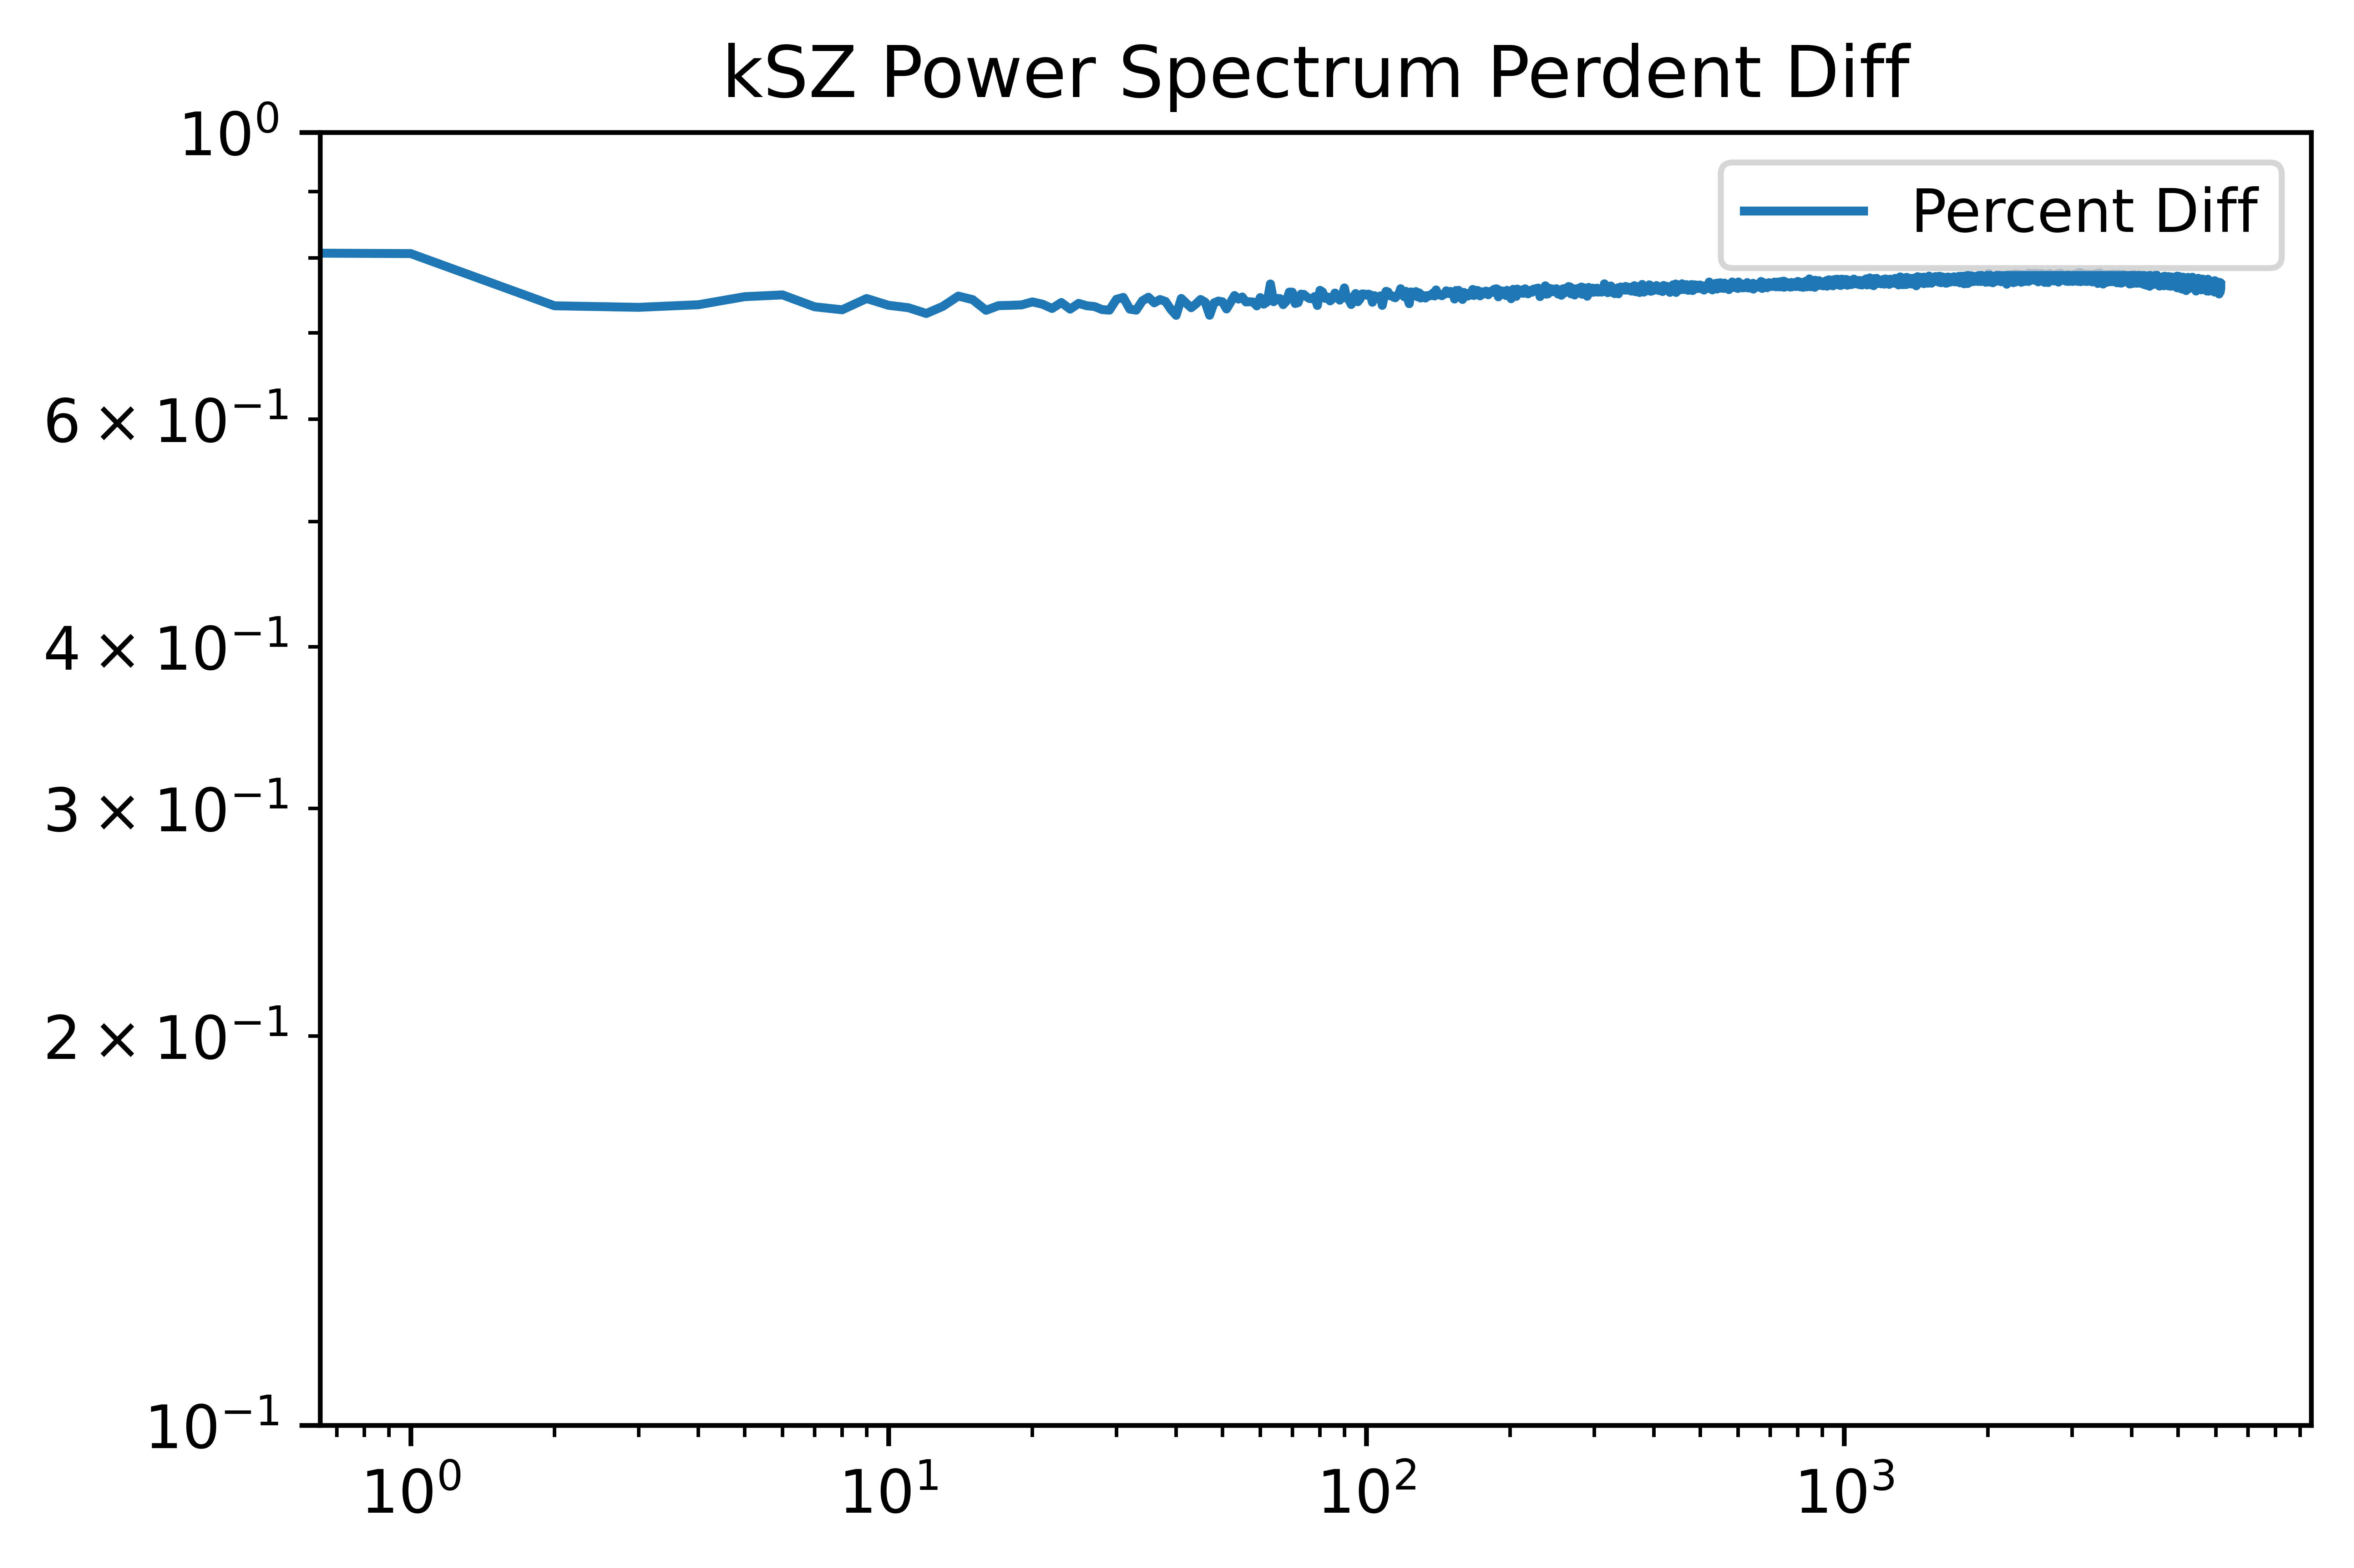

In [10]:
plt.figure(dpi=1200)
plt.loglog(np.abs(pskSZP2560NS2048-pskSZP2048NS2048)/pskSZP2560NS2048);
plt.legend(loc=0, labels=["Percent Diff"])
plt.title("kSZ Power Spectrum Perdent Diff")
plt.ylim(10**-1,10**0)
plt.show()

# Effect on Lensing

# Velocity Estimation Comparison

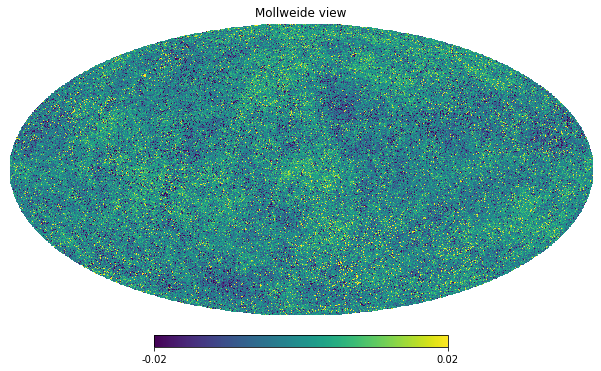

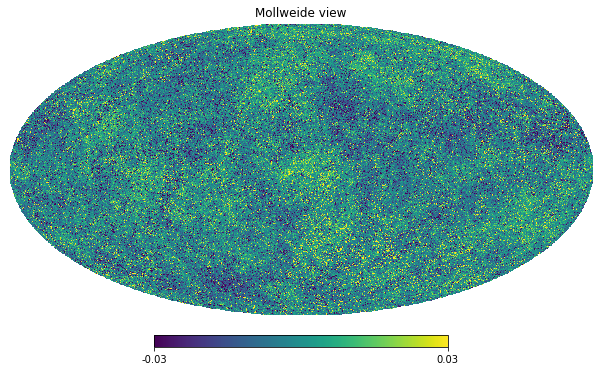

In [11]:
velFieldP2048NS2048 = hp.read_map("MAPS/velocityField_NS_2048_R_2048_P_2048_DV_256.fits")
velFieldP2560NS2048 = hp.read_map("MAPS/velocityField_NS_2048_R_2048_P_2560_DV_256.fits")
hp.mollview(velFieldP2048NS2048, min=-2*10**-2,max=2*10**-2)
hp.mollview(velFieldP2560NS2048, min=-3*10**-2,max=3*10**-2)

In [12]:
velGuessP2048NS2048 = kSZP2048NS2048/(overdensityP2048NS2048+1)
velGuessP2560NS2048 = kSZP2560NS2048/(overdensityP2560NS2048+1)

In [13]:
psVelGuessP2048NS2048 = hp.anafast(velGuessP2048NS2048)
psVelGuessP2560NS2048 = hp.anafast(velGuessP2560NS2048)
psVelFieldP2048NS2048 = hp.anafast(velFieldP2048NS2048)
psVelFieldP2560NS2048 = hp.anafast(velFieldP2560NS2048)

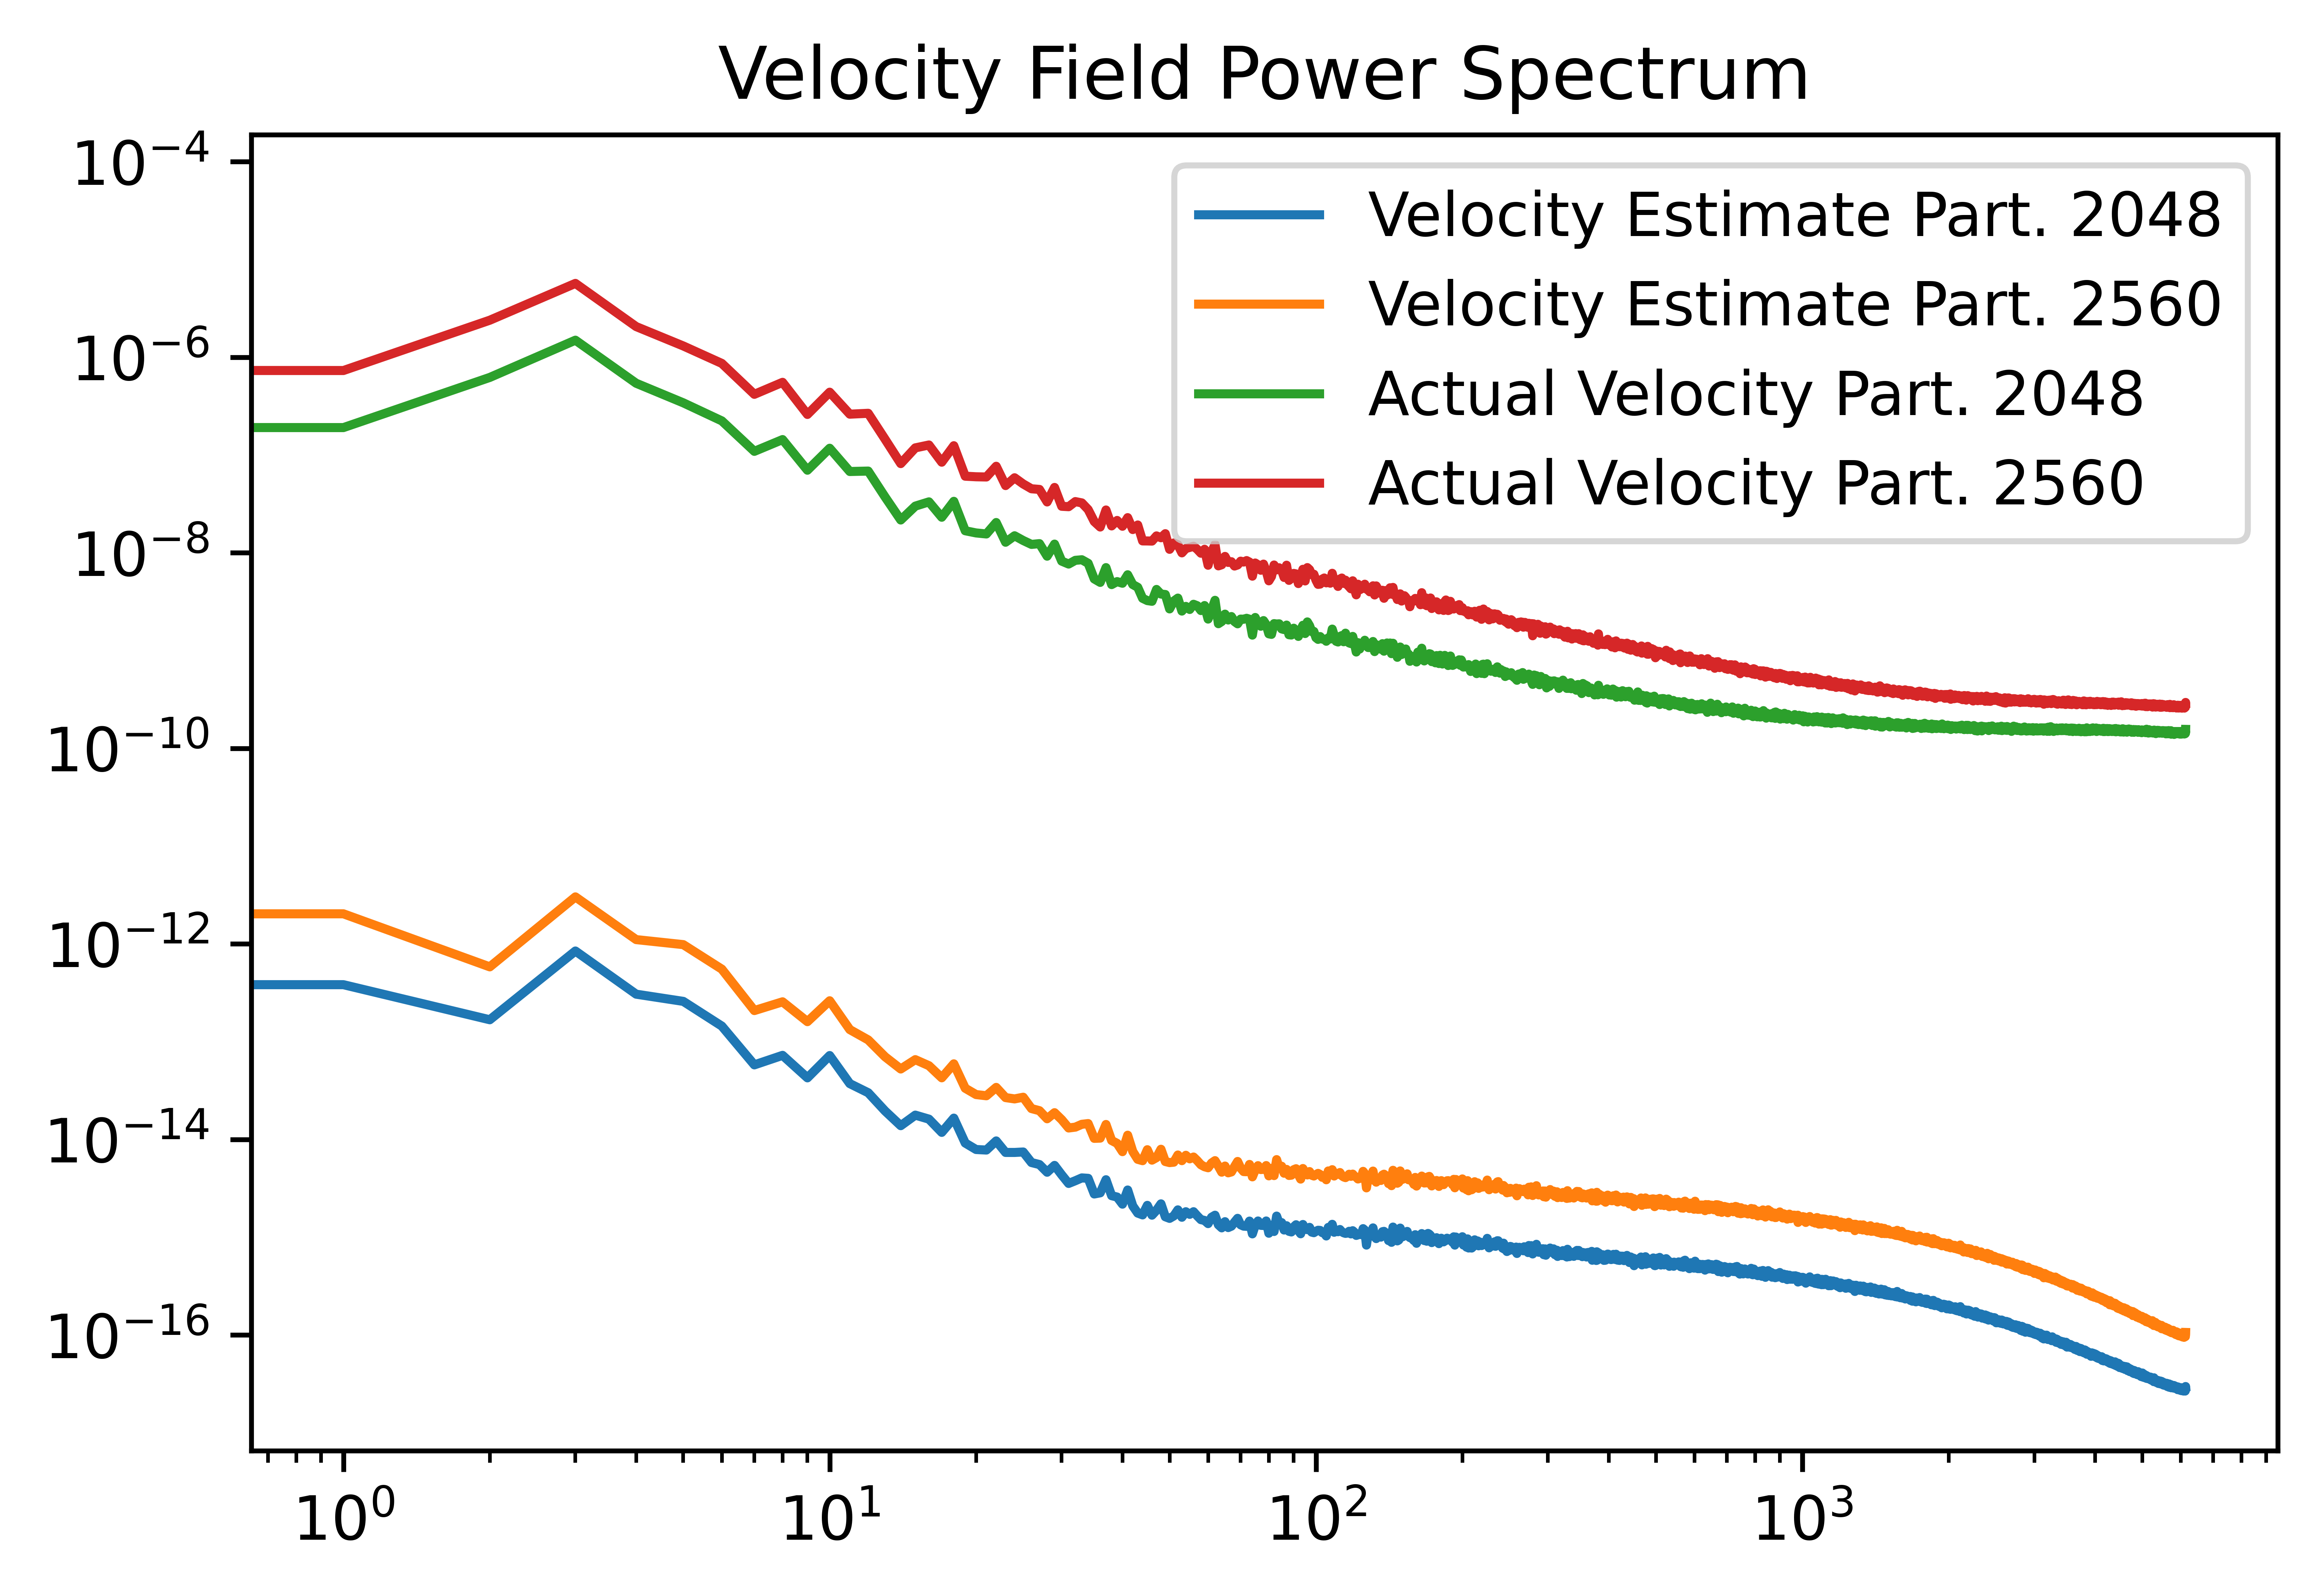

In [14]:
plt.figure(dpi=1200)
plt.loglog(psVelGuessP2048NS2048)
plt.loglog(psVelGuessP2560NS2048)
plt.loglog(psVelFieldP2048NS2048)
plt.loglog(psVelFieldP2560NS2048)
plt.legend(loc=0, labels=["Velocity Estimate Part. 2048","Velocity Estimate Part. 2560","Actual Velocity Part. 2048","Actual Velocity Part. 2560"])
plt.title("Velocity Field Power Spectrum")
plt.show()

In [15]:
correlationVelP2560 = hp.anafast(velGuessP2560NS2048, velFieldP2560NS2048)/np.sqrt(psVelGuessP2560NS2048*psVelFieldP2560NS2048)
correlationVelP2048 = hp.anafast(velGuessP2048NS2048, velFieldP2048NS2048)/np.sqrt(psVelGuessP2048NS2048*psVelFieldP2048NS2048)

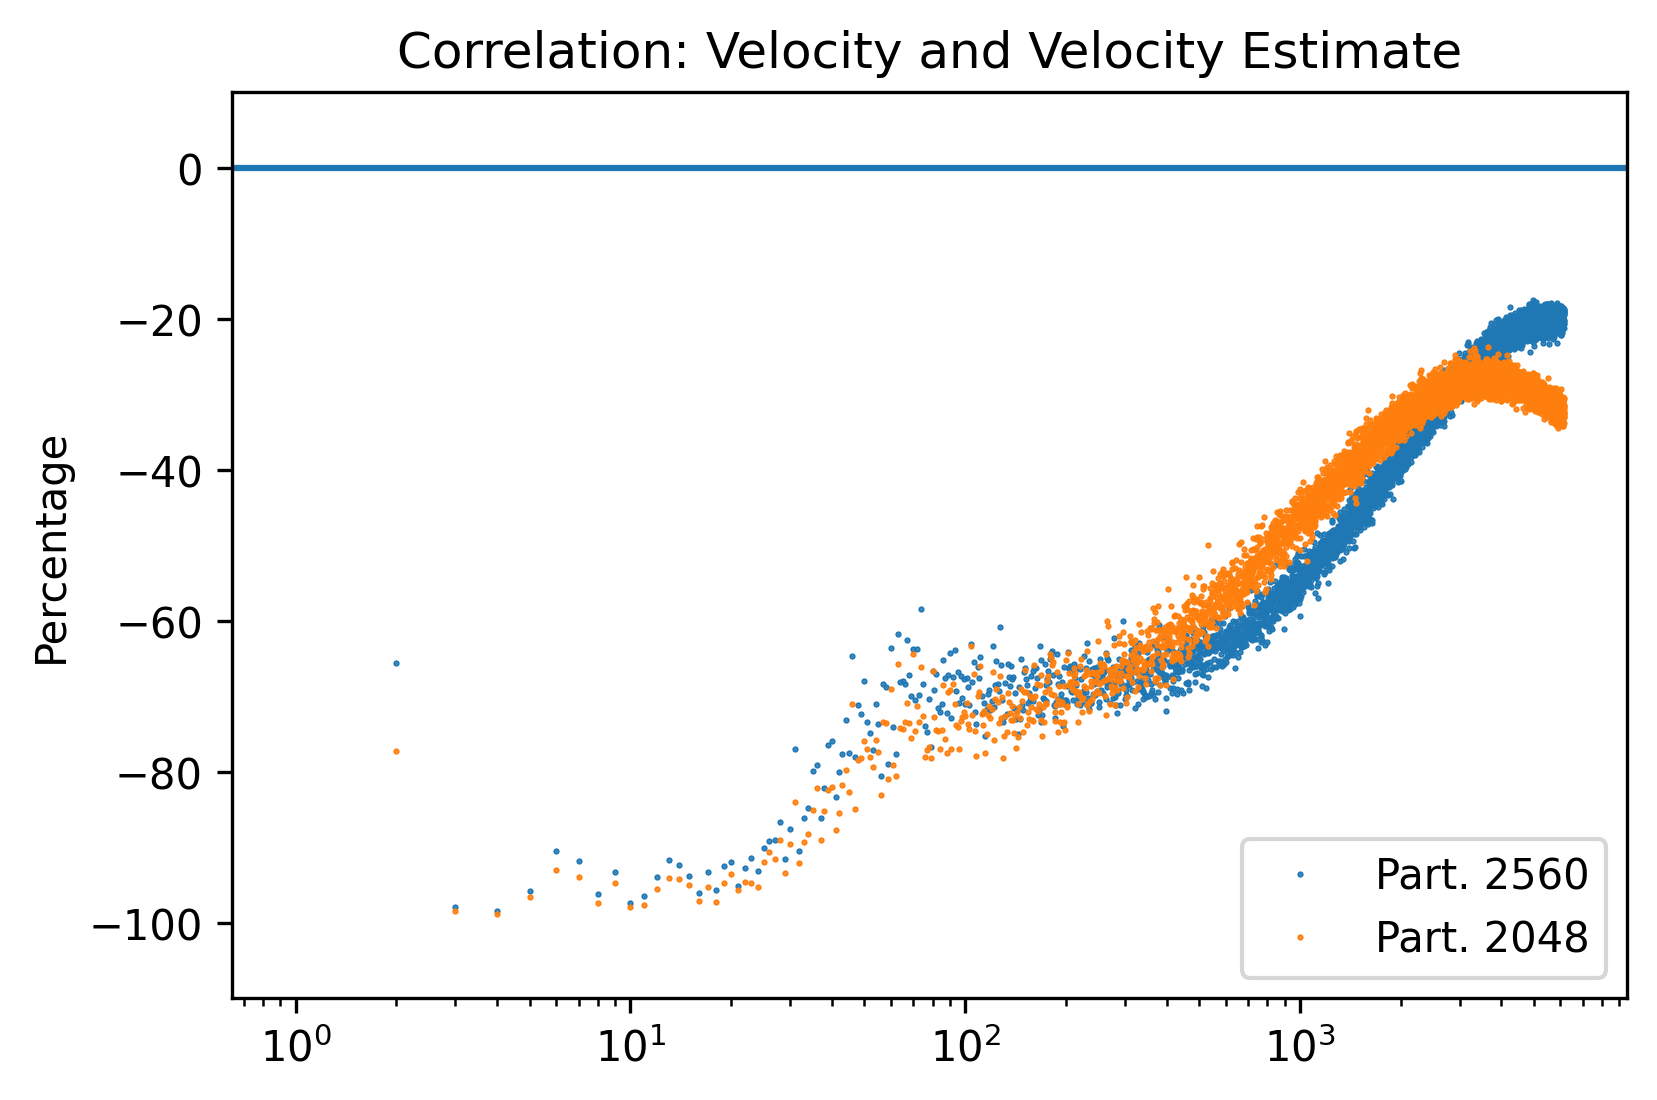

In [16]:
plt.figure(dpi=300)
plt.plot(correlationVelP2560*100,".",markersize=1);
plt.plot(correlationVelP2048*100,".",markersize=1);
plt.legend(loc=0, labels=["Part. 2560","Part. 2048"])
plt.title("Correlation: Velocity and Velocity Estimate")
plt.ylabel("Percentage")
plt.semilogx()
plt.axhline(0)
plt.ylim(-110,10)
plt.show()